In [1]:
import pandas as pd

In [3]:
titanic = pd.read_csv(r"C:\Users\laksh\Downloads\Titanic-Dataset.csv")

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"]
titanic = titanic.loc[:,cols]

In [7]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [8]:
y = titanic["Survived"] #Target variable
X = titanic.drop(columns=["Survived"])

In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


## Age and Fare has some missing values

In [14]:
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

Filling the missing values

In [15]:
X["Age"] = X["Age"].fillna(X["Age"].mean())
X["Fare"] = X["Fare"].fillna(X["Fare"].mean())

In [16]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [17]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.000000,1,0,7.2500
1,1,female,38.000000,1,0,71.2833
2,3,female,26.000000,0,0,7.9250
3,1,female,35.000000,1,0,53.1000
4,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000
887,1,female,19.000000,0,0,30.0000
888,3,female,29.699118,1,2,23.4500
889,1,male,26.000000,0,0,30.0000


In [18]:
X.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [22]:
X["Pclass"] = X["Pclass"].astype("category")
X["Sex"] = X["Sex"].astype("category")

In [23]:
X.dtypes

Pclass    category
Sex       category
Age        float64
SibSp        int64
Parch        int64
Fare       float64
dtype: object

In [27]:
X_dummis = pd.get_dummies(X, drop_first=True,dtype="int")

In [28]:
X_dummis.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male
0,22.0,1,0,7.2500,0,1,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,1,0
3,35.0,1,0,53.1000,0,0,0
4,35.0,0,0,8.0500,0,1,1


### Train Test Split 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummis, y , test_size=0.33, random_state=42)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(596, 7)
(596,)
(295, 7)
(295,)


### Model(NN) Building
3 Steps:
1. Model Definition:
    - Architecture of the model (#HL, #Nodes, #Activation Functions)
2. Model Compilation 
    - Optimization Algorithm (SGD, ADAM, ..),Learning Rate,Cost Function
3. Training
    - Epochs / Iterations, DataSets (Test and Train)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential()
model.add(Input(shape=(7,))) #No computation here-This is not mandatory
model.add(Dense(units=4 , activation='relu')) #HL
model.add(Dense(units=1 , activation = "sigmoid")) #Output layer - Activation on output layer is Sigmoid as it is binary classification

In [45]:
model.compile(optimizer=Adam(),loss="binary_crossentropy",metrics=["accuracy"])

In [46]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3775 - loss: 5.8903 - val_accuracy: 0.2746 - val_loss: 6.2408
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3674 - loss: 5.3133 - val_accuracy: 0.2746 - val_loss: 5.6088
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3691 - loss: 4.7774 - val_accuracy: 0.2746 - val_loss: 5.0290
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3708 - loss: 4.2985 - val_accuracy: 0.2678 - val_loss: 4.4947
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3641 - loss: 3.8363 - val_accuracy: 0.2712 - val_loss: 3.9965
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3674 - loss: 3.4041 - val_accuracy: 0.2746 - val_loss: 3.5662
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3708 - loss: 3.0377 - val_accuracy: 0.2746 - val_loss: 3.1387
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3725 - loss: 2.6914 - val_accuracy: 0.2746 - 

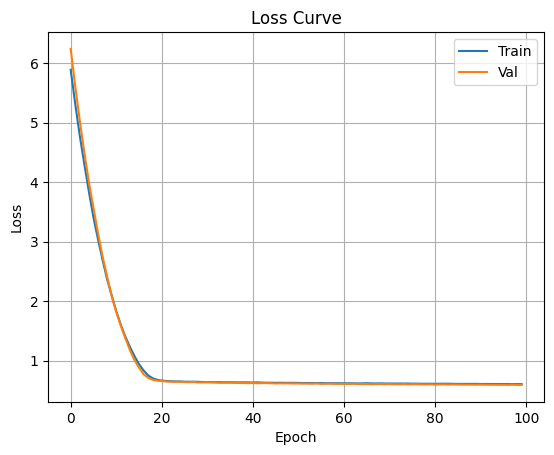

In [47]:
import matplotlib.pyplot as plt

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
#plt.ylim([0,500]) #Epoch 300
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'])
plt.title("Loss Curve")
plt.grid()
plt.show()

# we can also plot the accuracy curve
The loss will reduce where as the accuracy will increase

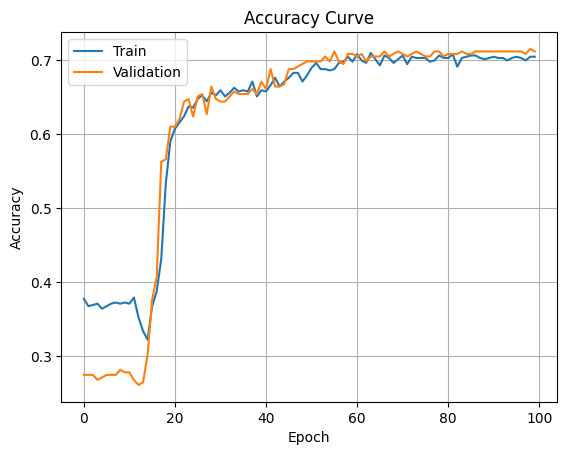

In [48]:
# Extract accuracy
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

# Plot accuracy
plt.plot(train_acc)
plt.plot(val_acc)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])
plt.title("Accuracy Curve")
plt.grid(True)
plt.show()